In [31]:
# words = [name.lower() for name in names]
words = open('names.txt', 'r').read().splitlines()
names = [
    'Maxim',
    'Andrej',
    'Anna',
    'Lex',
    'Jeremy',
    'Sergei',
    'Alexander',
    'Maxeo',
    'George',
    'Elon',
    'Faust',
    'Michael',
    'Jennifer',
    'James',
    'Emily',
    'David',
    'Ashley',
    'Christopher',
    'Sarah',
    'Matthew',
    'Jessica',
    'Joshua',
    'Megan',
    'Daniel',
    'Amanda',
    'Ryan',
    'Ethan',
    'Olivia',
    'Lucas',
    'Sophia',
    'Liam',
    'Ava',
    'Noah',
    'Isabella',
    'Mason',
    'Mia',
    'Jacob',
    'Charlotte',
    'William',
    'Abigail',
    'Jack',
    'Madison',
    'Henry',
    'Ella',
    'Samuel',
    'Quentin',
    'Grace',
    'Logan',
    'Victoria',
    'Owen',
    'Chloe',
    'Nathan',
    'Lily',
    'Benjamin',
    'Zoe',
    'Andrew',
    'Nora',
    'Thomas',
    'Hannah',
    'Joseph',
    'Amelia',
    'Robert',
    'Luna',
    'Charles',
    'Scarlett',
    'Jason',
    'Harper',
    'Aaron',
    'Aria',
    'Tyler',
    'Ellie',
    'Brian',
    'Sophie',
    'Kevin',
    'Aurora',
    'Steven',
    'Hazel',
    'Eric',
    'Zoey',
    'Patrick',
    'Stella',
    'Mark',
    'Lucy',
    'Anthony',
    'Peyton',
    'Brandon',
    'Layla',
    'Sean',
    'Savannah',
    'Richard',
    'Skylar',
    'Paul',
    'Ariana',
    'Edward',
    'Brooklyn',
    'Peter',
    'Caroline',
    'Scott',
    'Aubrey',
    'Jason',
    'Penelope'
]



In [32]:
# train a trigram language model, i.e. take two characters as an input to predict the 3rd one
# Feel free to use either counting or a neural net. Evaluate the loss; 
# Did it improve over a bigram model?

In [33]:
special = '.'
chars = sorted(list((set(''.join(words)))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi[special] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [34]:
import torch

In [35]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [36]:
for w in words:
    characters = [special] + list(w) + [special]
    for ch1, ch2 in zip(characters, characters[1:]):
        # numerical representation of character
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1,ch2,ix1,ix2)
        
        # increment counter in coordinates of related "bigram"
        N[ix1, ix2] += 1

. . 0 0
. e 0 5
e m 5 13
m m 13 13
m a 13 1
a . 1 0
. o 0 15
o l 15 12
l i 12 9
i v 9 22
v i 22 9
i a 9 1
a . 1 0
. a 0 1
a v 1 22
v a 22 1
a . 1 0
. i 0 9
i s 9 19
s a 19 1
a b 1 2
b e 2 5
e l 5 12
l l 12 12
l a 12 1
a . 1 0
. s 0 19
s o 19 15
o p 15 16
p h 16 8
h i 8 9
i a 9 1
a . 1 0
. c 0 3
c h 3 8
h a 8 1
a r 1 18
r l 18 12
l o 12 15
o t 15 20
t t 20 20
t e 20 5
e . 5 0
. m 0 13
m i 13 9
i a 9 1
a . 1 0
. a 0 1
a m 1 13
m e 13 5
e l 5 12
l i 12 9
i a 9 1
a . 1 0
. h 0 8
h a 8 1
a r 1 18
r p 18 16
p e 16 5
e r 5 18
r . 18 0
. e 0 5
e v 5 22
v e 22 5
e l 5 12
l y 12 25
y n 25 14
n . 14 0
. a 0 1
a b 1 2
b i 2 9
i g 9 7
g a 7 1
a i 1 9
i l 9 12
l . 12 0
. e 0 5
e m 5 13
m i 13 9
i l 9 12
l y 12 25
y . 25 0
. e 0 5
e l 5 12
l i 12 9
i z 9 26
z a 26 1
a b 1 2
b e 2 5
e t 5 20
t h 20 8
h . 8 0
. m 0 13
m i 13 9
i l 9 12
l a 12 1
a . 1 0
. e 0 5
e l 5 12
l l 12 12
l a 12 1
a . 1 0
. a 0 1
a v 1 22
v e 22 5
e r 5 18
r y 18 25
y . 25 0
. s 0 19
s o 19 15
o f 15 6
f i 6 9
i a 9 1
a . 1 0
. 

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

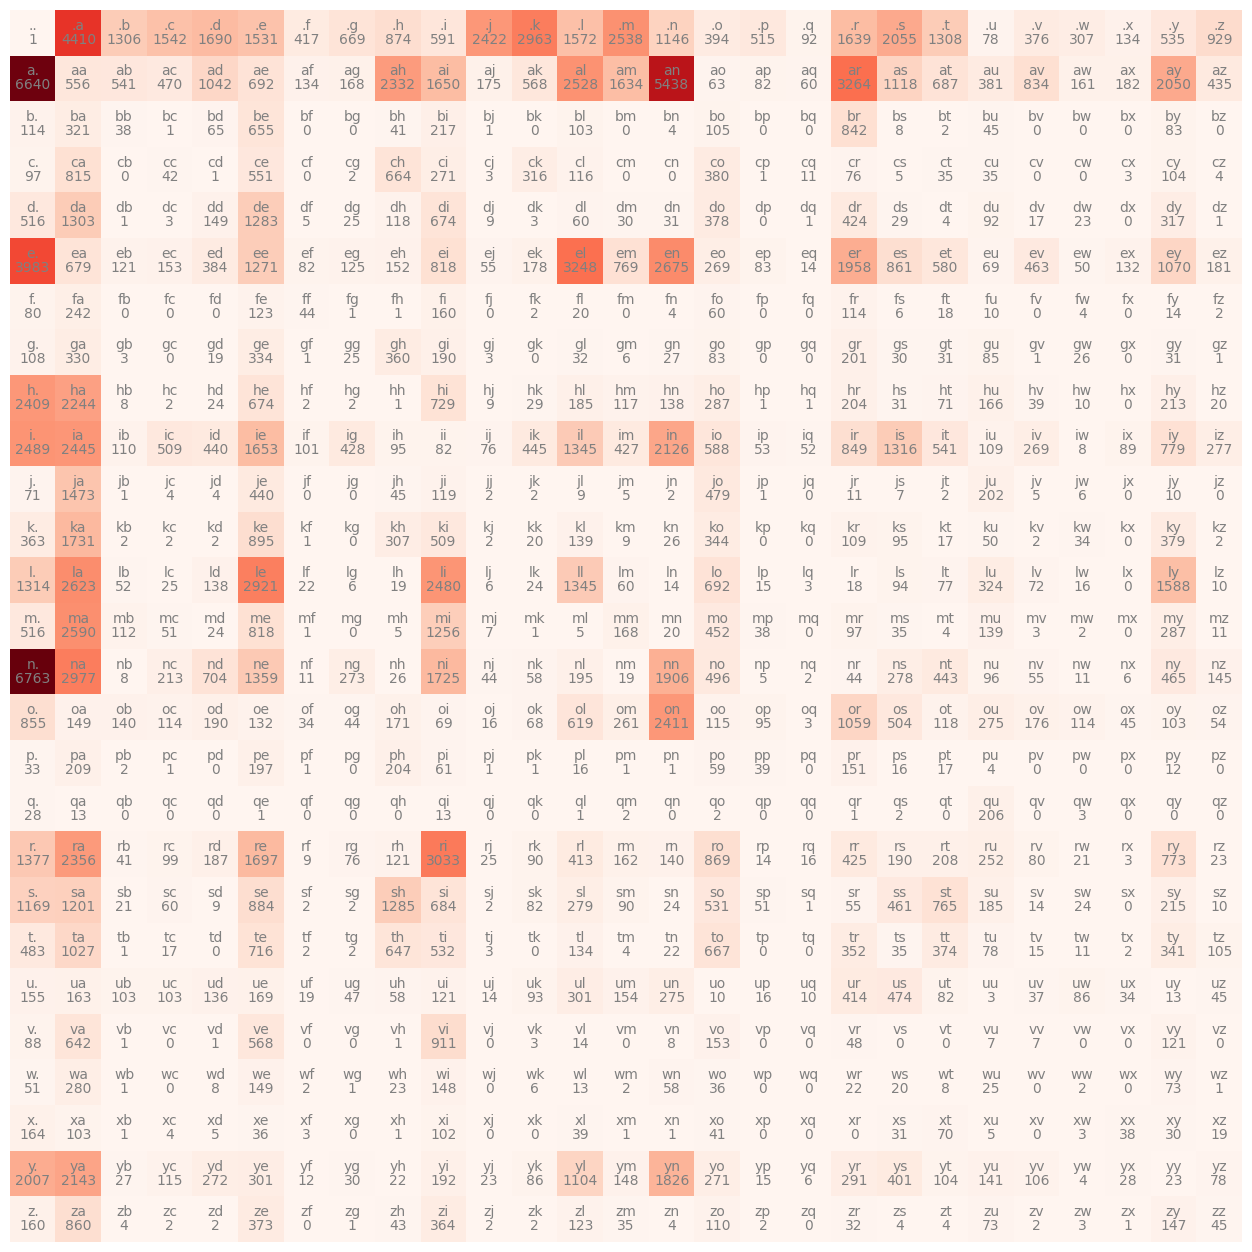

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Reds')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        style_props = {"ha":"center",  "color":"gray"}
        plt.text(j, i, chstr, **style_props, va="bottom")
        plt.text(j, i, N[i, j].item(), **style_props, va="top")
plt.axis('off')

In [38]:
P = N.float()

# normalize each each element in each row with respect to
# all other elements in the same row
# e.g. X = [
#            [1,2,3],
#            [1,1,1],
#          ]
# dimension = 1 <-- columns
# X = X / X.sum(dimenstion, keepdim=True)
# X
# [
#    [0.16, 0.33, 0.5],
#    [0.33, 0,33, 0,33]
# ]

P = P / P.sum(1, keepdim=True)
P

tensor([[3.1217e-05, 1.3767e-01, 4.0769e-02, 4.8136e-02, 5.2756e-02, 4.7793e-02,
         1.3017e-02, 2.0884e-02, 2.7284e-02, 1.8449e-02, 7.5607e-02, 9.2495e-02,
         4.9073e-02, 7.9228e-02, 3.5774e-02, 1.2299e-02, 1.6077e-02, 2.8719e-03,
         5.1164e-02, 6.4151e-02, 4.0832e-02, 2.4349e-03, 1.1738e-02, 9.5836e-03,
         4.1831e-03, 1.6701e-02, 2.9000e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-

In [39]:
def get_next_index(current_index):
    p = P[current_index]
    ix = torch.multinomial(p, num_samples=1, replacement=True).item()
    return ix

In [43]:
for _ in range(20):
    index = 0
    name = ''
    names = []
    while True:
        index = get_next_index(index)
        # print(index)
        name += itos[index]
        if index == 0:
            names.extend(name)
            break

    print(''.join(names))

rano.
an.
taynenasyoabrinn.
ma.
deovanaron.
sbryaya.
asthynirainincamete.
kylecka.
s.
lyschan.
la.
aio.
hremaden.
hesh.
via.
mi.
lennahess.
welasamueuliso.
emonalalian.
helley.


In [44]:
log_likelihood = 0.0
n = 0
for w in words:
# for w in ['mm']:
    characters = [special] + list(w) + [special]
    for ch1, ch2 in zip(characters, characters[1:]):
        # numerical representation of character
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1

nll = -log_likelihood
print(f'{nll/n}')

2.454129457473755


In [45]:
# lets create a training set of bigrams (x, y)
xs, ys = [], []

for w in words:
    chs = [special] + list(w) + [special]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1,ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

. .
. e
e m
m m
m a
a .
. o
o l
l i
i v
v i
i a
a .
. a
a v
v a
a .
. i
i s
s a
a b
b e
e l
l l
l a
a .
. s
s o
o p
p h
h i
i a
a .
. c
c h
h a
a r
r l
l o
o t
t t
t e
e .
. m
m i
i a
a .
. a
a m
m e
e l
l i
i a
a .
. h
h a
a r
r p
p e
e r
r .
. e
e v
v e
e l
l y
y n
n .
. a
a b
b i
i g
g a
a i
i l
l .
. e
e m
m i
i l
l y
y .
. e
e l
l i
i z
z a
a b
b e
e t
t h
h .
. m
m i
i l
l a
a .
. e
e l
l l
l a
a .
. a
a v
v e
e r
r y
y .
. s
s o
o f
f i
i a
a .
. c
c a
a m
m i
i l
l a
a .
. a
a r
r i
i a
a .
. s
s c
c a
a r
r l
l e
e t
t t
t .
. v
v i
i c
c t
t o
o r
r i
i a
a .
. m
m a
a d
d i
i s
s o
o n
n .
. l
l u
u n
n a
a .
. g
g r
r a
a c
c e
e .
. c
c h
h l
l o
o e
e .
. p
p e
e n
n e
e l
l o
o p
p e
e .
. l
l a
a y
y l
l a
a .
. r
r i
i l
l e
e y
y .
. z
z o
o e
e y
y .
. n
n o
o r
r a
a .
. l
l i
i l
l y
y .
. e
e l
l e
e a
a n
n o
o r
r .
. h
h a
a n
n n
n a
a h
h .
. l
l i
i l
l l
l i
i a
a n
n .
. a
a d
d d
d i
i s
s o
o n
n .
. a
a u
u b
b r
r e
e y
y .
. e
e l
l l
l i
i e
e .
. s


In [48]:
import torch.nn.functional as F

In [104]:
# initialize 27 neurons' weights, each of them receives 27 inputs
W = torch.randn((27, 27), requires_grad=True)

In [194]:
# forward pass vvvv
for k in range(200):
    # convert each of the examples from bigrams to one-hot representation
    xenc = F.one_hot(xs, num_classes=27).float()
    # predict log-counts
    logits  = xenc @ W
    # counts, equivalent to what we have in N
    counts = logits.exp()
    # probabilities for next character
    probs = counts / counts.sum(1, keepdims=True)
    
    loss = -probs[torch.arange(num), ys].log().mean()

In [195]:
print(loss.item())

2.5216267108917236


In [196]:
# backward pass
W.grad = None 
loss.backward()

In [197]:
W.data += -90 * W.grad

In [200]:
for _ in range(20):
    index = 0
    name = ''
    names = []
    while True:
        xenc = F.one_hot(torch.tensor([index]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)


        index = torch.multinomial(p, num_samples=1, replacement=True).item()

        name += itos[index]
        if index == 0:
            names.extend(name)
            break

    print(''.join(names))

ja.
xuda.
h.
ensyade.
aoreneken.
kazanalce.
h.
n.
ia.
kameinlonohulodvienershlapgularoron.
zantwzlueldvada.
jery.
hanean.
mi.
pqulfoxkac.
many.
fga.
babfde.
mcri.
valeyvi.
